# The Sparks Foundation

## Piyush Kumar

## (Data Science & Business Analytics Intern)

### GRIP Task #2 - Prediction using Unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.cluster import DBSCAN

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\piyus\OneDrive\Desktop\Sparks Foundation\Task-2\Iris.csv')

In [4]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,117,6.5,3.0,5.5,1.8,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [1]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

NameError: name 'df' is not defined

In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
from sklearn.preprocessing import scale
scaled_data = scale(df)

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 6):
    km = KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

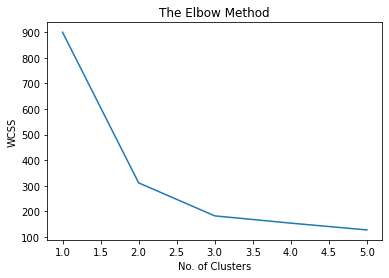

In [10]:
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmc = KMeans(n_clusters=3)
y_kmeans = kmc.fit_predict(scaled_data)

In [12]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(scaled_data, kmc.labels_)
print(silhouette)

0.5091771839395356


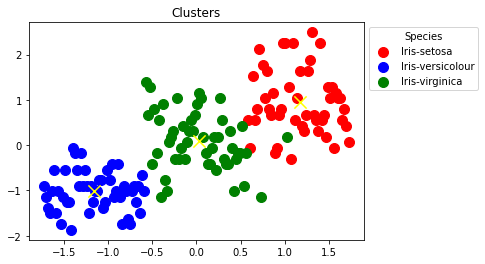

In [13]:
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_data[y_kmeans == 2, 0], scaled_data[y_kmeans == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], 
            marker='x', s = 150, c='yellow')
plt.title('Clusters')
plt.legend(loc='best', title='Species', frameon=True, bbox_to_anchor=(1, 1))
plt.show()